In [1]:
from pylab import *
import cv2

In [2]:
imagen = cv2.imread('img/1.jpg')

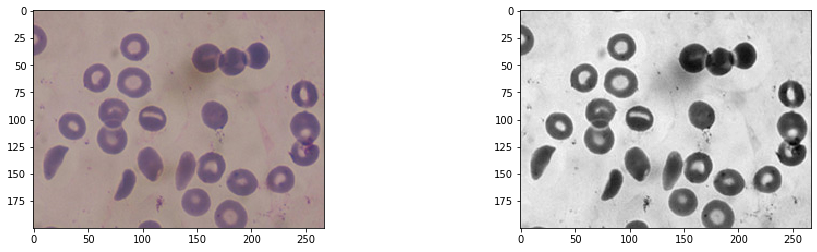

In [3]:
rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

_, (ax1, ax2) = subplots(1, 2, figsize=(16, 4))
ax1.imshow(rgb)
ax2.imshow(gray, cmap="gray")
show()

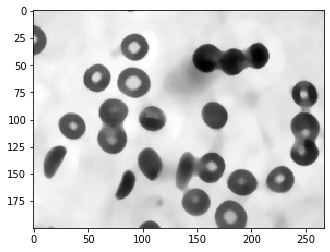

In [4]:
gray = cv2.medianBlur(gray, 9)

imshow(gray, cmap="gray")
show()

In [5]:
def canny(image, sigma=0.33):
    
    v = np.median(image)

    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    return edged

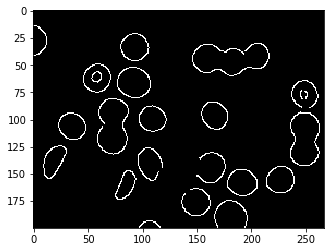

In [6]:
edges = canny(gray)

imshow(edges, cmap="gray")
show()

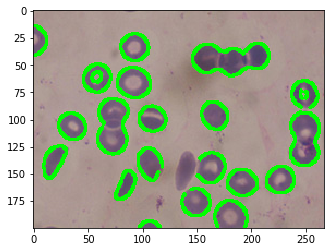

In [7]:
#Buscar los contornos de las bolas y los dibujar en verde
contours,_ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(rgb, contours, -1, (0,255,0), 2)
imshow(rgb)
show()

In [8]:
len(contours)

35

In [9]:
#Buscar el centro de las bolas y pintar en rojo
for i in contours:
    #Calcular el centro a partir de los momentos
    momentos = cv2.moments(i)
    
    try:
        cx = int(momentos['m10']/momentos['m00'])
        cy = int(momentos['m01']/momentos['m00'])
    except:
        pass
 
    #Dibujar el centro
    cv2.circle(rgb,(cx, cy), 3, (0,0,255), -1)

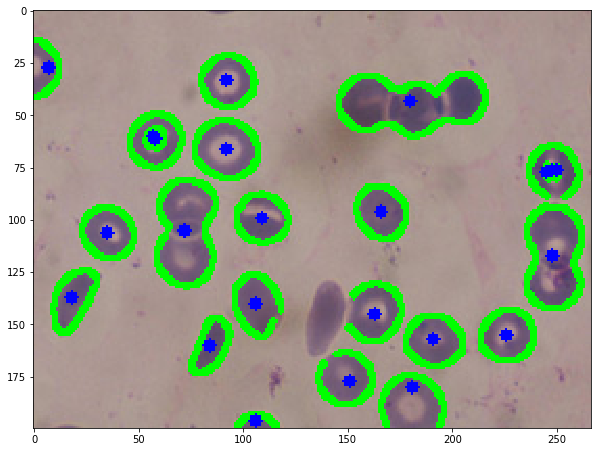

In [10]:
_, (ax1) = subplots(1, 1, figsize=(10,10))
ax1.imshow(rgb)
show()